In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from skimage.measure import label, regionprops

In [2]:
df_track_outp = pd.read_csv('../example_data/Pos58/TXRED/track_output/track_output_bayesian.csv', index_col= 'frame')

In [3]:
hf_track_outp = h5py.File('../example_data/Pos58/TXRED/track_output/label_stack_bayesian.h5', 'r')
hf_track_outp.keys()
label_stack = np.array(hf_track_outp.get('label_stack'))
hf_track_outp.close()

## Cell life cycle

Text(0.5, 1.0, 'Cell life cycle')

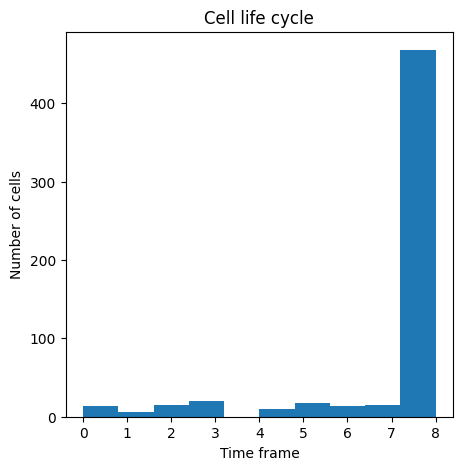

In [4]:
life_cycle = df_track_outp['last_frame'] - df_track_outp['first_frame']
plt.figure(figsize=(5,5))
plt.hist(life_cycle)
plt.xlabel('Time frame')
plt.ylabel('Number of cells')
plt.title('Cell life cycle')

## Cell area

Text(0, 0.5, 'Cell Area')

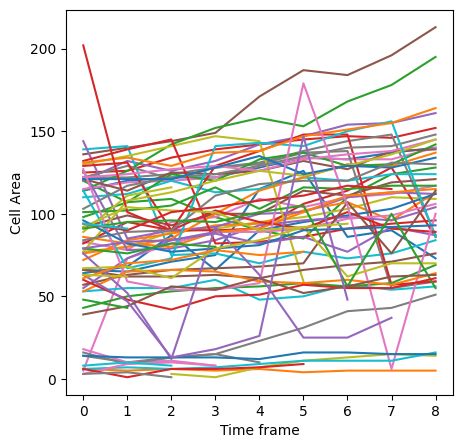

In [5]:
cell_ids = np.unique(df_track_outp['trackID'])

plt.figure(figsize=(5,5))
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].area.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')

## Cell length

Text(0, 0.5, 'Cell Length (major axis)')

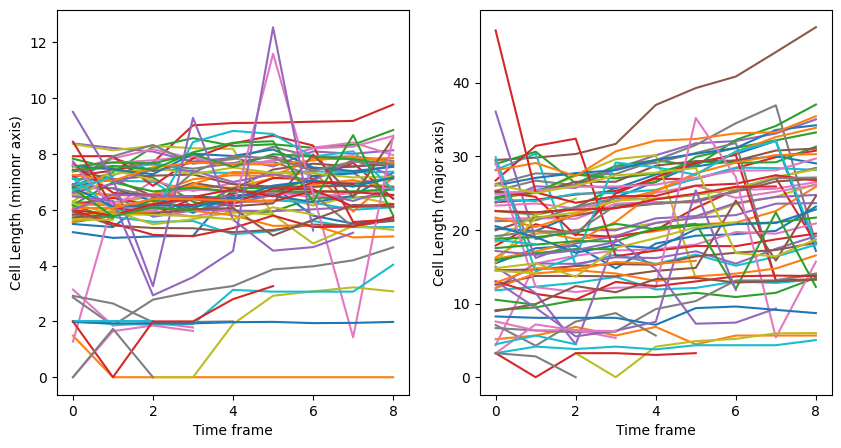

In [6]:
cell_ids = np.unique(df_track_outp['trackID'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].minor_axis_length.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Length (minonr axis)')

plt.subplot(1,2,2)
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].major_axis_length.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Length (major axis)')

## Mean intensity

Text(0, 0.5, 'Cell Area')

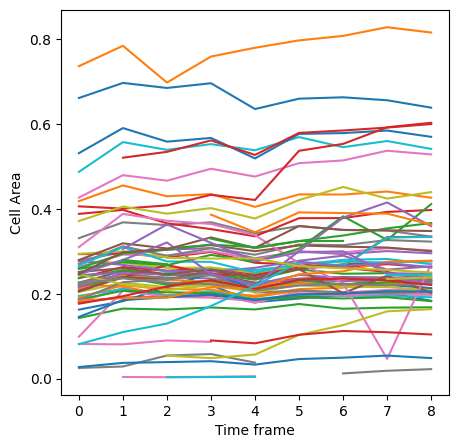

In [7]:
cell_ids = np.unique(df_track_outp['trackID'])

plt.figure(figsize=(5,5))
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].intensity_mean)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')

## Lineage

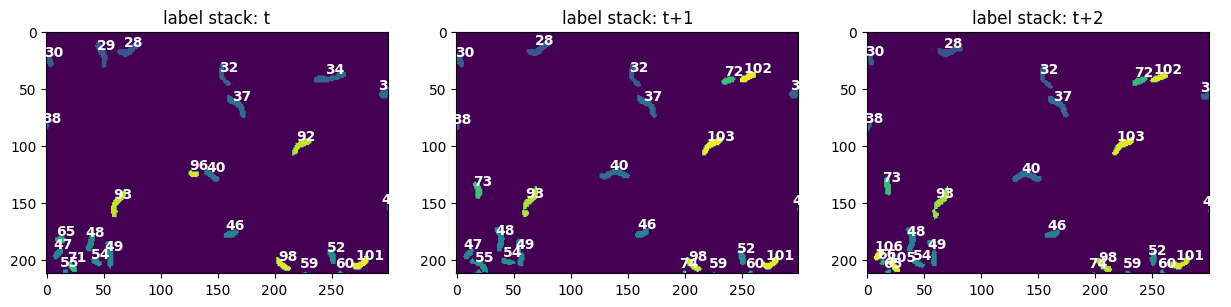

In [8]:
plt.figure(figsize = (15,5))
ax = plt.subplot(1,3,1)
img = np.array(label_stack)[2][300:,:300]
plt.imshow(img)
plt.title('label stack: t')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,2)
img = np.array(label_stack)[3][300:,:300]
plt.imshow(img)
plt.title('label stack: t+1')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,3)
img = np.array(label_stack)[4][300:,:300]
plt.imshow(img)
plt.title('label stack: t+2')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

In [9]:
df_track_outp.loc[2].iloc[25:36]

,trackID,trackID_d1,trackID_d2,trackID_mother,split_frame,area,x,y,intensity_mean,intensity_min,intensity_max,minor_axis_length,major_axis_length,first_frame,last_frame
frame,,,,,,,,,,,,,,,
2,26,26,26,26,NaN,125.0,23.902094,274.240929,0.233678,0.097182,0.367124,7.223817,26.532217,0,8
2,27,27,27,27,NaN,82.0,397.630177,274.318311,0.192678,0.085229,0.347251,6.560214,16.495521,0,8
2,28,28,28,28,NaN,122.0,71.866208,316.506101,0.289840,0.111652,0.483687,8.326489,23.112275,0,8
2,29,29,29,29,NaN,116.0,49.195239,320.617507,0.286165,0.123899,0.481406,7.066286,24.242676,0,2
2,30,30,30,30,NaN,55.0,2.418009,325.105027,0.539495,0.260304,0.751320,5.568830,12.808844,0,8
2,32,32,32,32,NaN,80.0,154.747731,338.310110,0.211369,0.104063,0.313960,6.563833,22.123824,0,8
2,33,33,33,33,NaN,53.0,507.331576,335.805743,0.203850,0.123777,0.277898,6.658835,10.466797,0,8
2,34,72,102,34,3.0,145.0,247.524239,340.710595,0.366332,0.192996,0.569676,6.515389,32.382279,0,8
2,35,77,108,35,6.0,84.0,297.893380,353.860435,0.254613,0.126898,0.397810,7.459697,15.383137,0,8


In [10]:
df_track_outp.loc[3].iloc[25:40]

,trackID,trackID_d1,trackID_d2,trackID_mother,split_frame,area,x,y,intensity_mean,intensity_min,intensity_max,minor_axis_length,major_axis_length,first_frame,last_frame
frame,,,,,,,,,,,,,,,
3,26,26,26,26,NaN,124.0,24.114732,274.057481,0.254662,0.119836,0.384976,7.267247,26.531328,0,8
3,27,27,27,27,NaN,89.0,398.747485,274.735177,0.191042,0.071987,0.334994,6.736386,17.207005,0,8
3,28,28,28,28,NaN,124.0,72.120629,315.551578,0.307525,0.150037,0.489439,7.650761,24.299803,0,8
3,30,30,30,30,NaN,60.0,2.626812,324.849437,0.552981,0.278073,0.796602,5.600074,13.618258,0,8
3,32,32,32,32,NaN,89.0,154.822925,338.385659,0.210124,0.105644,0.323449,7.096122,23.934395,0,8
3,33,33,33,33,NaN,55.0,507.474286,335.691518,0.201520,0.110705,0.286553,6.791682,10.829559,0,8
3,34,34,34,34,NaN,82.0,255.350798,340.020482,0.352650,0.178175,0.435690,6.489295,16.432283,0,8
3,35,77,108,35,6.0,88.0,297.925346,353.386812,0.252088,0.148109,0.413049,7.393869,16.277682,0,8
3,36,36,36,36,NaN,63.0,309.642335,360.118324,0.314959,0.173101,0.430901,5.339256,15.354098,0,8


In [11]:
df_track_outp.loc[3].iloc[50:]

,trackID,trackID_d1,trackID_d2,trackID_mother,split_frame,area,x,y,intensity_mean,intensity_min,intensity_max,minor_axis_length,major_axis_length,first_frame,last_frame
frame,,,,,,,,,,,,,,,
3,55,65,105,55,4.0,92.0,20.188152,505.346886,0.247282,0.158462,0.334213,9.296912,18.764493,0,4
3,56,56,56,56,NaN,54.0,432.715645,506.760845,0.333043,0.179848,0.438203,6.023487,11.535009,0,8
3,57,57,57,57,NaN,8.0,367.224739,510.683636,0.086871,0.061310,0.103191,1.782613,5.321869,0,3
3,58,58,58,58,NaN,15.0,423.225457,510.673485,0.058038,0.018930,0.115961,1.981655,8.701580,0,4
3,59,59,59,59,NaN,1.0,226.000000,511.000000,0.048360,0.048360,0.048360,0.000000,0.000000,0,8
3,60,60,60,60,NaN,7.0,257.754170,510.669675,0.171314,0.125204,0.247725,1.905471,4.155375,0,8
3,61,61,61,61,NaN,13.0,326.842985,510.679394,0.041213,0.031469,0.052278,1.930911,8.062587,0,8
3,64,64,64,64,NaN,101.0,359.030545,475.548646,0.561732,0.297058,0.805960,6.201759,22.746958,1,8
3,66,66,66,66,NaN,NaN,13.874636,504.509101,NaN,NaN,NaN,NaN,NaN,1,4
